In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import pandas as pd
from zipfile import ZipFile
from visualizations import plot_geopandas, plot_correlation, plot_pie
from matplotlib import pyplot as plt
from pns_dict import PNS_DICT
from constants import BRAZIL_IDH

PNS_DATA = Path('../data/processed/PNS_2019/all.zip').resolve()
zip_pns = ZipFile(PNS_DATA)
df = pd.read_csv(zip_pns.open(zip_pns.namelist()[0]), sep=",", low_memory=False)

In [2]:
PNS_DICT.df

,index,origin,desc,pv
0,uf,V0001,Unidade da Federação,"{11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 1..."
1,moradores,V0022,Total de moradores,{}
2,tipo_zona,V0026,Tipo de situação censitária,"{1: 'Urbano', 2: 'Rural'}"
3,tipo_area,V0031,Tipo de área,"{1: 'Capital', 2: 'Resto da RM (Região Metropo..."
4,V0025A,V0025A,Seleção do morador de 15 anos ou mais para res...,"{0: 'Não selecionado', 1: 'Selecionado', 9: 'N..."
...,...,...,...,...
374,Y00101,Y00101,Idade do morador quando teve relações sexuais ...,{}
375,Y002,Y002,Nos últimos doze meses teve relações sexuais?,"{1: 'Sim', 2: 'Não', 3: 'Recusou-se a responder'}"
376,Y003,Y003,Nos últimos doze meses nas relações sexuais qu...,"{1: 'Sempre', 2: 'Às vezes', 3: 'Nenhuma vez'..."
377,phq9_total,N010|N011|N012|N013|N014|N015|N016|N017|N018,Valor de risco para depressão segundo question...,{}


In [3]:
df

,uf,moradores,tipo_zona,tipo_area,V0025A,renda_pc,casa_tipo,A002010,A003010,A004010,...,V034,V03501,V03502,V03503,Y001,Y00101,Y002,Y003,phq9_total,depression_severity
0,31,2,1,4,1,6.0,1,1,2,1,...,2.0,NaN,2.0,NaN,1.0,35.0,1.0,3.0,NaN,NaN
1,41,1,1,2,1,6.0,2,1,2,1,...,NaN,NaN,NaN,NaN,1.0,20.0,1.0,3.0,7.0,2.0
2,25,2,2,4,1,3.0,1,1,1,3,...,NaN,NaN,NaN,NaN,1.0,20.0,2.0,NaN,NaN,NaN
3,42,4,1,2,1,3.0,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,13.0,2.0,NaN,NaN,NaN
4,12,2,1,1,1,1.0,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,22.0,2.0,NaN,21.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,13,5,1,2,1,1.0,1,4,1,2,...,NaN,NaN,NaN,NaN,1.0,15.0,1.0,2.0,5.0,2.0
90842,32,5,1,1,1,4.0,2,1,3,2,...,NaN,NaN,NaN,NaN,3.0,NaN,1.0,3.0,0.0,1.0
90843,43,1,1,1,1,7.0,2,1,1,1,...,NaN,NaN,NaN,NaN,1.0,16.0,1.0,2.0,0.0,1.0
90844,11,2,1,1,1,6.0,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,28.0,1.0,3.0,9.0,2.0


# Caracterização dos dados

In [4]:
print("O dataset PNS possui {} linhas e {} colunas (features).".format(*df.shape))

O dataset PNS possui 90846 linhas e 379 colunas (features).


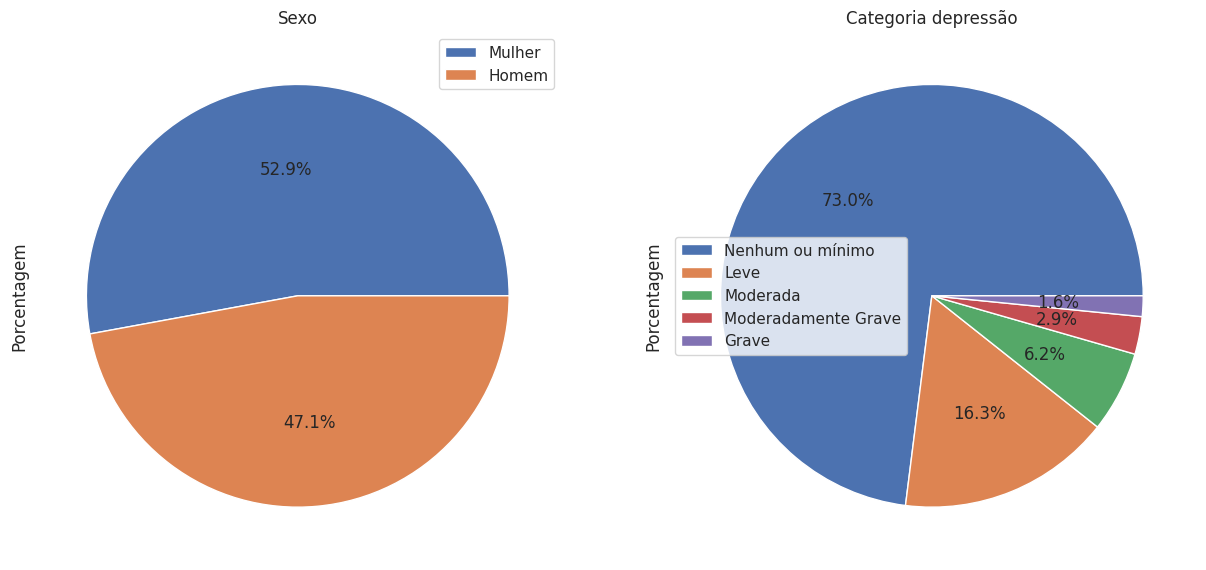

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_pie(df, 'sexo', 'Sexo', desc_dict=PNS_DICT.get_pv_dict('sexo'), ax=axes[0])
plot_pie(df, 'depression_severity',  'Categoria depressão', desc_dict=PNS_DICT.get_pv_dict('depression_severity'), ax=axes[1])
plt.show()

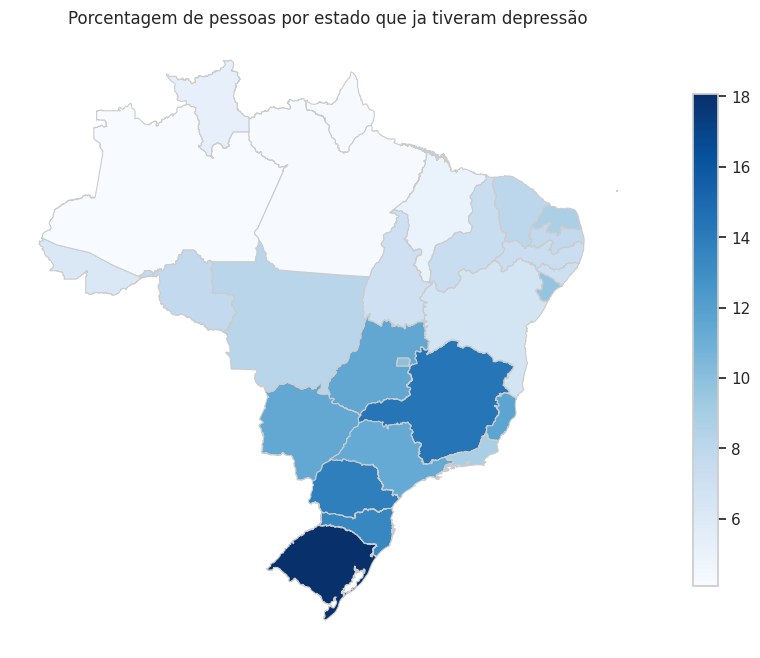

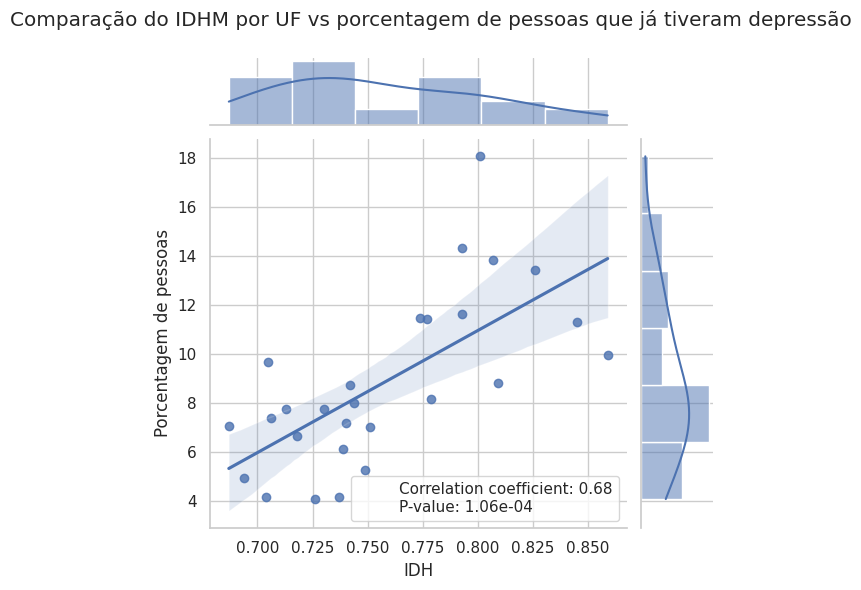

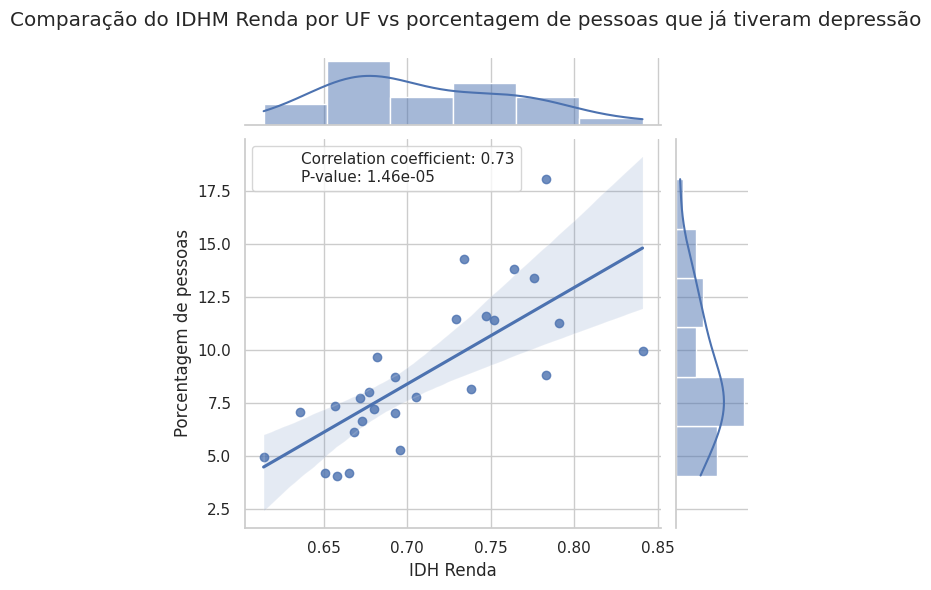

In [7]:
selected = df[['uf']][df['Q092'].isin([1])].value_counts() * 100 / df[['uf']].value_counts()
selected.name = 'values'
selected = selected.reset_index()
plot_geopandas(selected, title="Porcentagem de pessoas por estado que ja tiveram depressão", uf_key='uf')

selected2 = BRAZIL_IDH.merge(selected, left_on='codigo_ibg', right_on='uf')

plot_correlation(selected2, x='IDHM', y='values',
                 title='Comparação do IDHM por UF vs porcentagem de pessoas que já tiveram depressão',
                 xlabel='IDH', ylabel='Porcentagem de pessoas')

plot_correlation(selected2, x='IDHM Renda', y='values',
                 title='Comparação do IDHM Renda por UF vs porcentagem de pessoas que já tiveram depressão',
                 xlabel='IDH Renda', ylabel='Porcentagem de pessoas')

In [9]:
selected2

,name,codigo_ibg,Territorialidade,Posição IDHM,IDHM,Posição IDHM Renda,IDHM Renda,Posição IDHM Educação,IDHM Educação,Posição IDHM Longevidade,IDHM Longevidade,uf,values
0,Acre,12,Acre,17,0.739,21,0.668,16,0.728,13,0.830,12,6.134454
1,Alagoas,27,Alagoas,27,0.687,26,0.636,26,0.643,21,0.793,27,7.063944
2,Amazonas,13,Amazonas,20,0.726,23,0.658,13,0.735,23,0.792,13,4.081633
3,Amapá,16,Amapá,18,0.737,22,0.665,16,0.728,14,0.828,16,4.182754
4,Bahia,29,Bahia,21,0.718,19,0.673,24,0.672,17,0.818,29,6.641159
5,Ceará,23,Ceará,14,0.744,18,0.677,12,0.740,16,0.823,23,8.018757
6,Espírito Santo,32,Espírito Santo,7,0.793,8,0.747,11,0.741,2,0.902,32,11.635131
7,Goiás,52,Goiás,11,0.774,11,0.729,7,0.770,15,0.827,52,11.472983
8,Maranhão,21,Maranhão,26,0.694,27,0.614,20,0.704,27,0.773,21,4.960630
9,Minas Gerais,31,Minas Gerais,7,0.793,10,0.734,7,0.770,6,0.883,31,14.321367


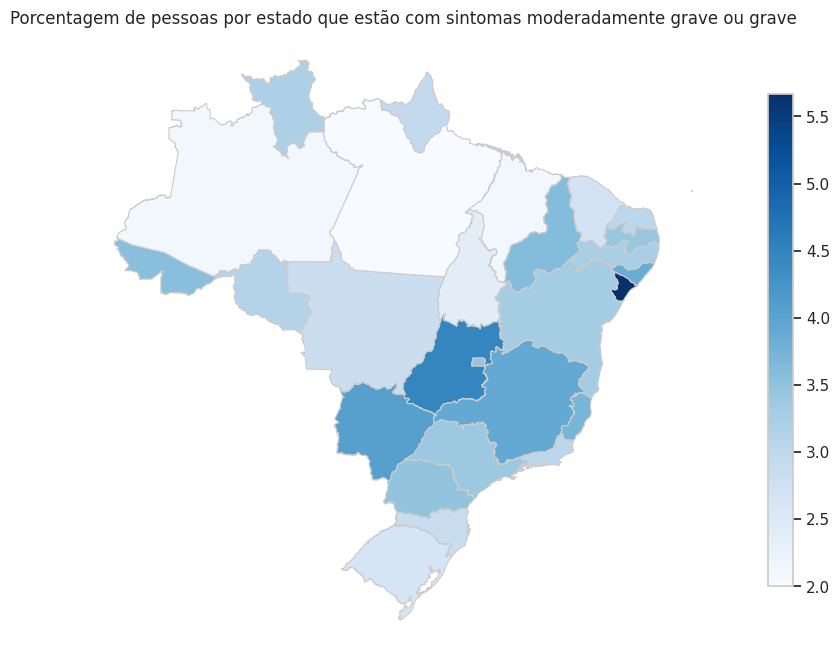

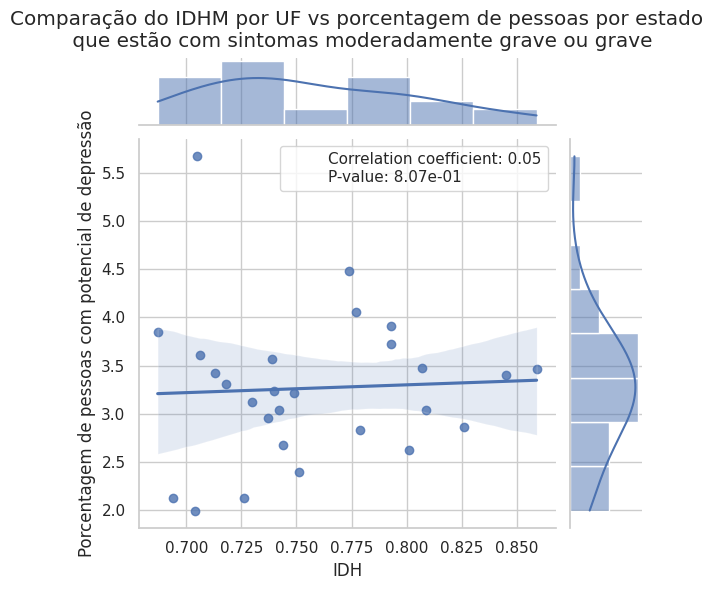

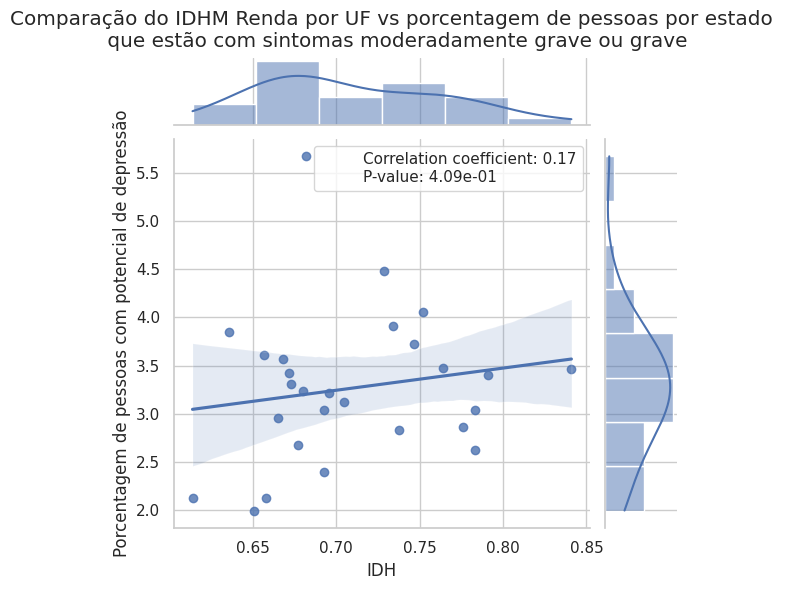

In [10]:
plt.show()
selected = df[['uf']][df['depression_severity'].isin([4, 5])].value_counts() * 100 / df[['uf']].value_counts()
selected.name = 'values'
selected = selected.reset_index()
plot_geopandas(selected, title="Porcentagem de pessoas por estado que estão com sintomas moderadamente grave ou grave", uf_key='uf')

selected2 = BRAZIL_IDH.merge(selected, left_on='codigo_ibg', right_on='uf')

plot_correlation(selected2, x='IDHM', y='values',
                 title='Comparação do IDHM por UF vs porcentagem de pessoas por estado \n que estão com sintomas moderadamente grave ou grave',
                 xlabel='IDH', ylabel='Porcentagem de pessoas com potencial de depressão')

plot_correlation(selected2, x='IDHM Renda', y='values',
                 title='Comparação do IDHM Renda por UF vs porcentagem de pessoas por estado \n que estão com sintomas moderadamente grave ou grave',
                 xlabel='IDH', ylabel='Porcentagem de pessoas com potencial de depressão')